In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [51]:
# y_true = 30
# y_pred = 20

# b1 => 10
# b2 => 8
# b3 => 15

(10 + 8 + 15) / 3

11.0

In [52]:
cd "/content/drive/My Drive/Colab Notebooks/dw_matrix"

/content/drive/My Drive/Colab Notebooks/dw_matrix


In [53]:
ls data

men_shoes.csv


In [54]:
df = pd.read_csv('data/men_shoes.csv', low_memory=False)
df.shape

(18280, 48)

In [55]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [0]:
mean_price = np.mean( df['prices_amountmin'])
mean_price

In [0]:
y_true = df['prices_amountmin']
y_pred = [mean_price] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

63.968341227870624

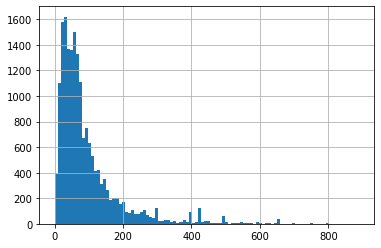

In [0]:
df['prices_amountmin'].hist(bins=100)

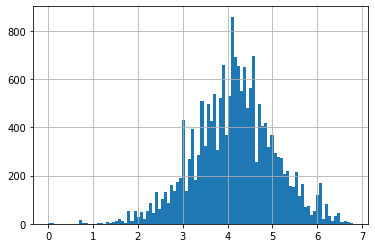

In [0]:
np.log1p( df['prices_amountmin']) .hist(bins=100)

In [0]:
np.log1p(0)

0.0

In [0]:
y_true = df['prices_amountmin']
y_pred = [np.median(y_true)] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.01120240700219

In [0]:
np.median(y_true)

64.95

In [0]:
y_true = df['prices_amountmin']
price_log_mean = np.expm1( np.mean( np.log1p(y_true)))
y_pred = [price_log_mean] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.03539547661041

In [0]:
np.exp( np.mean( np.log1p(y_true)))-1

62.92811169273113

In [0]:
np.expm1( np.mean( np.log1p(y_true)))

62.92811169273113

In [0]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [0]:
df.brand.value_counts()

Nike                         1709
PUMA                          574
Ralph Lauren                  524
New Balance                   361
VANS                          356
                             ... 
Earrings-MidwestJewellery       1
Van's                           1
ralph lauren                    1
Efco                            1
LLOYD                           1
Name: brand, Length: 1856, dtype: int64

In [0]:
df['brand_cat'] = df['brand'].factorize()[0]


In [0]:
feats = ['brand_cat']
X = df[ feats].values
y = df['prices_amountmin'].values
model = DecisionTreeRegressor(max_depth=5)

scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
np.mean(scores), np.std(scores)

(-58.38655694633361, 4.223555478221712)

In [0]:
def run_model(feats):
  X = df[ feats].values
  y = df['prices_amountmin'].values

  model = DecisionTreeRegressor(max_depth=5)

  scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)

In [0]:
run_model(['brand_cat'])

(-58.38655694633361, 4.223555478221712)

In [0]:
df['manufacturer_cat'] = df['manufacturer'].factorize()[0]


In [0]:
feats = ['manufacturer_cat']
X = df[ feats].values
y = df['prices_amountmin'].values
model = DecisionTreeRegressor(max_depth=5)

scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
np.mean(scores), np.std(scores)

(-63.133649278023746, 3.394307434888982)

In [0]:
def run_model(feats):
  X = df[ feats].values
  y = df['prices_amountmin'].values

  model = DecisionTreeRegressor(max_depth=5)

  scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)

In [0]:
run_model(['manufacturer_cat'])

(-63.133649278023746, 3.394307434888982)

In [0]:
ls matrix_one

day3.ipynb


In [0]:
!git add matrix_one/day4.ipynb

In [45]:
!git status

On branch master
Your branch is up to date with 'origin/master'.

Changes to be committed:
  (use "git reset HEAD <file>..." to unstage)

	new file:   matrix_one/day4.ipynb

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   matrix_one/day3.ipynb



In [46]:
!git commit -m "Day 4"


*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@c675cb38c630.(none)')


In [0]:
!git config --global user.email "dawid.ulanowski123@gmail.com"
!git config --global user.name "Dawid"

In [49]:
!git push -u origin master

Branch 'master' set up to track remote branch 'master' from 'origin'.
Everything up-to-date
